In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BMW_Data.csv')

In [3]:
df.sample(3)

,Date,Adj_Close,Close,High,Low,Open,Volume
1973,2004-06-02,16.525906,34.590000,34.900002,34.570000,34.790001,1668550
4780,2015-06-11,61.799606,101.250000,102.650002,100.599998,101.000000,1854943
373,1998-04-15,18.216404,40.863998,42.241001,40.549000,42.241001,522600


In [4]:
df['Date'] = pd.to_datetime(df['Date']) 

In [5]:
df

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


In [6]:
df.describe()

,Date,Adj_Close,Close,High,Low,Open,Volume
count,7212,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,2010-11-05 03:40:13.976705536,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
min,1996-11-08 00:00:00,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,2003-10-07 18:00:00,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,2010-10-19 12:00:00,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,2017-11-22 06:00:00,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,2024-12-30 00:00:00,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07
std,NaN,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Low','Date']),df['Low'],test_size=0.2,random_state=42)

In [9]:
X_train

,Adj_Close,Close,High,Open,Volume
2534,19.659340,39.770000,40.830002,40.450001,2491695
911,14.822226,33.250000,33.250000,32.700001,1432750
6530,64.516624,79.980003,79.980003,78.209999,1725794
5714,48.083359,69.410004,69.989998,69.610001,1964372
6818,105.959068,112.519997,113.000000,112.680000,808875
...,...,...,...,...,...
3772,33.504574,62.380001,63.689999,62.849998,2449543
5191,55.445034,87.000000,87.040001,86.650002,1077436
5226,55.221985,86.650002,87.019997,86.000000,1105107
5390,57.830719,87.220001,87.900002,86.589996,1955585


In [10]:
X_train.describe()

,Adj_Close,Close,High,Open,Volume
count,5769.000000,5769.000000,5769.000000,5769.000000,5.769000e+03
mean,36.188636,56.660029,57.339746,56.673593,2.100956e+06
std,23.616929,25.277506,25.443116,25.274171,1.484979e+06
min,8.065074,17.040001,17.955000,17.650000,0.000000e+00
25%,16.463795,34.470001,34.930000,34.500000,1.195629e+06
50%,27.762934,50.080002,50.770000,50.049999,1.787865e+06
75%,53.460503,79.519997,80.250000,79.529999,2.619743e+06
max,108.059044,122.599998,123.750000,123.300003,2.871954e+07


In [11]:
X_train = X_train[X_train.select_dtypes(include='number').columns]+ 0.0001
X_test = X_test[X_test.select_dtypes(include='number').columns]+ 0.0001

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
#my function to cheque positive value in the column of a dataframe
def positive_values_check(x):
    # Check if x is a DataFrame or Series
    if isinstance(x, pd.DataFrame):
        df = x
    elif isinstance(x, pd.Series):
        df = pd.DataFrame(x)  # Convert Series to DataFrame for uniform handling
    else:
        raise ValueError("Input must be a DataFrame or Series.")
    
    result = {}
    for col in df.columns:
        positives = (df[col] > 0).sum()
        negatives = (df[col] < 0).sum()
        zeros = (df[col] == 0).sum()
        result[col] = {'Positive': positives, 'Negative': negatives, 'Zero': zeros}
    return pd.DataFrame(result)

        

In [14]:
# Pass only a data frame
positive_values_check(X_test['Volume'])

,Volume
Negative,0
Positive,1443
Zero,0


In [15]:
def Power_Transformer(model,id):
    
    # Initialize PowerTransformer objects
    
    if id ==1:
        pt1 = PowerTransformer(method='box-cox')
        name, pt = 'box-cox', pt1 
    elif id ==2:
        pt2 = PowerTransformer(method='yeo-johnson')
        name, pt = 'yeo-johnson', pt2
    
    # Apply PowerTransformers
     
    
    if id ==1:
        X_train_trf = pt1.fit_transform(X_train)
        X_test_trf = pt1.fit_transform(X_test)
        X_var = X_train_trf
        X_var_t = X_test_trf
        
    elif id ==2:
        X_train_trf2 = pt2.fit_transform(X_train)
        X_test_trf2 = pt2.fit_transform(X_test)
        X_var = X_train_trf2
        X_var_t = X_test_trf2
        
        
    # Fit the passed model
    model.fit(X_var, y_train)  # Using Yeo-Johnson transformation in this example
    
    # Predict using the passed model
    y_pred = model.predict(X_var_t)

    # Calculate cross-validation score using the passed model
    cross_val = np.mean(cross_val_score(model,X_var , y_train, scoring='r2'))

    # Print evaluation results
    print(f"R² Score from Cross Validation: {cross_val}")

    # return X_train_trf, X_test_trf
    return y_pred, cross_val, X_var, X_var_t, pt ,name

    
    
    

In [26]:
lr = LinearRegression()
# Change the value of power transformer(lr,X) X = 1 for box-cox, X=2 for yeo-johnson 
y_pred, cross_val,X_train_trf, X_test_trf, pt ,name = Power_Transformer(lr, 2)
y_pred

R² Score from Cross Validation: 0.9786222372574581


array([23.06153803, 42.14323002, 73.43226754, ..., 87.22212242,
       84.03829964, 76.23889557])

In [17]:
y_test

308     25.211000
381     37.069000
5716    69.680000
2312    36.930000
251     25.270000
          ...    
2903    39.020000
4581    88.550003
6434    88.220001
5547    84.459999
4955    72.139999
Name: Low, Length: 1443, dtype: float64

In [18]:
X_train_trf

array([[-0.56214177, -0.5549515 , -0.53033831, -0.52128521,  0.46521603],
       [-1.00927996, -0.91318766, -0.94462625, -0.94715575, -0.33014989],
       [ 1.17774704,  0.95634891,  0.93265674,  0.90478207, -0.08161565],
       ...,
       [ 0.96240185,  1.14183081,  1.12840174,  1.12410744, -0.64809015],
       [ 1.02667522,  1.15712995,  1.15193785,  1.14004204,  0.09576449],
       [-1.34771346, -1.31576794, -1.32539773, -1.34417564, -0.33005194]])

In [19]:
X_test_trf

array([[-1.43638217, -1.41959345, -1.42356056, -1.39679653, -1.91983369],
       [-0.77491592, -0.63097897, -0.60802047, -0.61526775, -1.08895348],
       [ 0.83809212,  0.72402448,  0.70701517,  0.72495105, -0.07692263],
       ...,
       [ 1.33579222,  1.22778899,  1.24531326,  1.26490775, -0.69981602],
       [ 1.084444  ,  1.13196241,  1.12592414,  1.14464   , -0.26001791],
       [ 0.71142211,  0.79844571,  0.82437361,  0.83421595,  0.00333745]])

In [20]:
from scipy.stats import skew

## Without any function transformer

Adj_Close -->has skewness--> 0.8189453213096872


C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3911505720.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


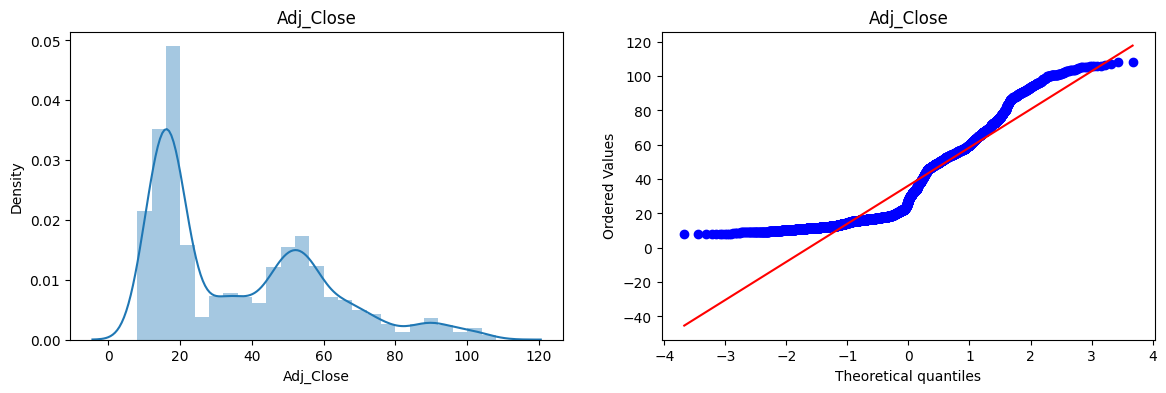

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3911505720.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Close -->has skewness--> 0.32622196377230184


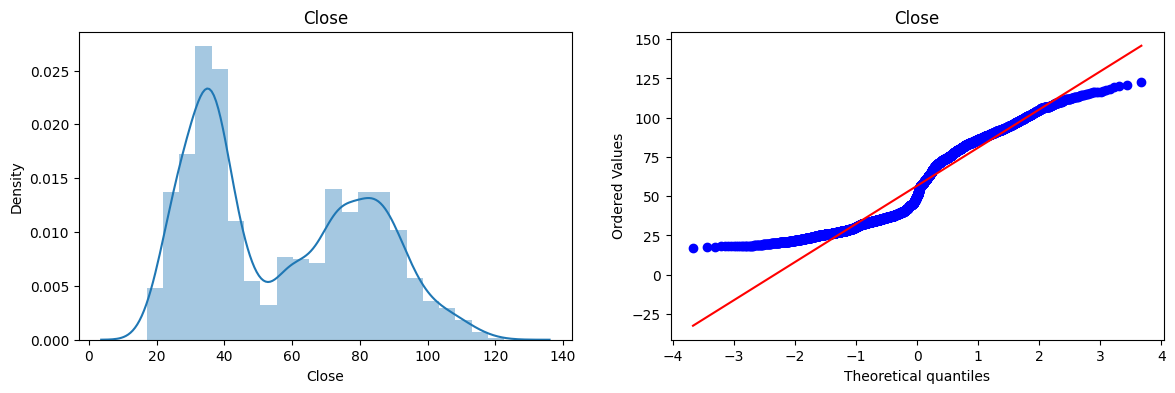

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3911505720.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


High -->has skewness--> 0.32583578608854646


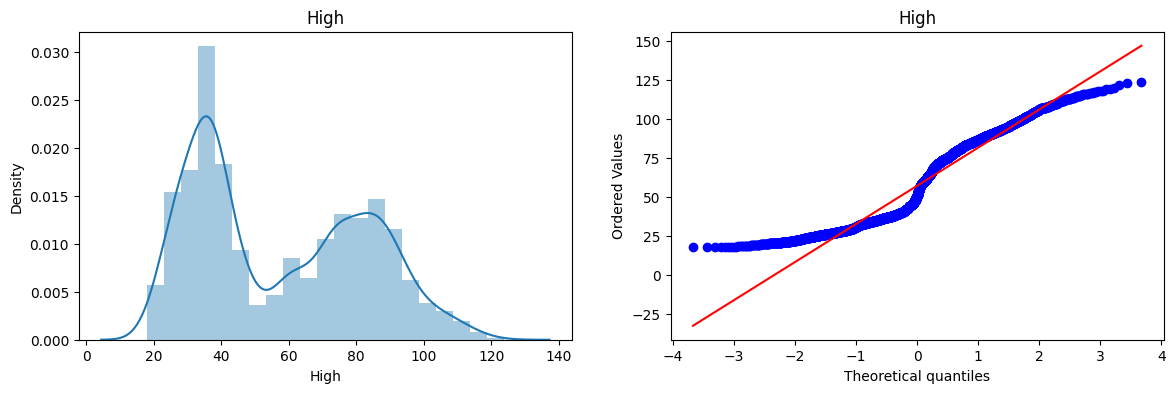

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3911505720.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Open -->has skewness--> 0.3271459764713708


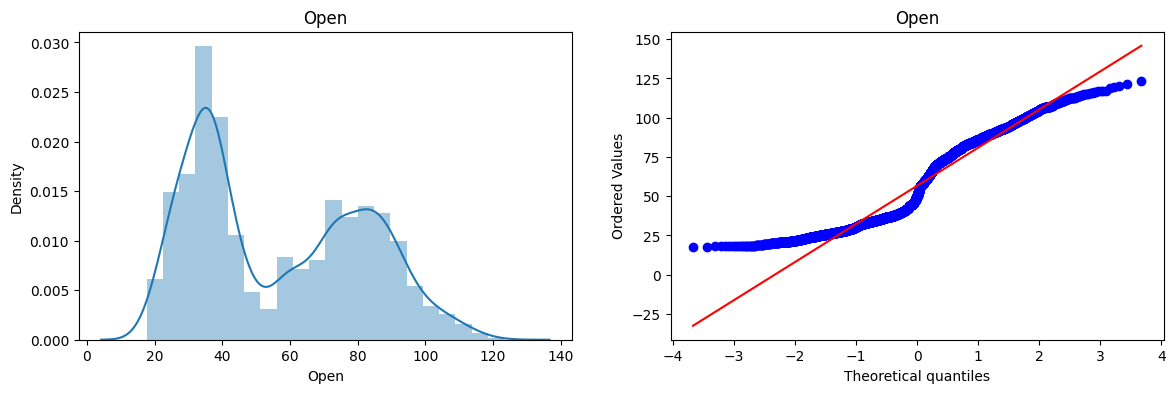

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3911505720.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Volume -->has skewness--> 3.534615901633198


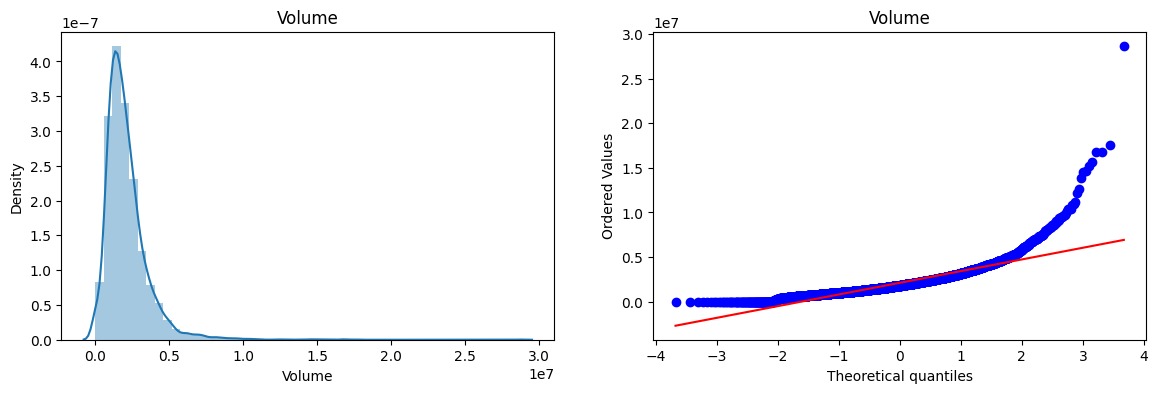

In [21]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
for col in X_train.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # sns.histplot(X_train[col],kde=True,stat="density")
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    print(f'{col} -->has skewness--> {skew(X_train[col])}')
    plt.show()

## With Box-Cox function transformer 

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Adj_Close -->has skewness--> 0.032765160436404095


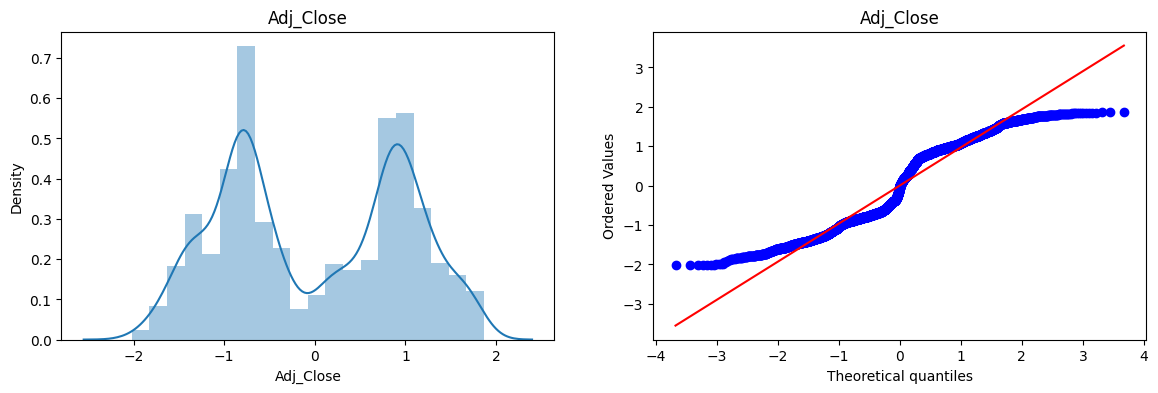

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Close -->has skewness--> -0.03704938246313996


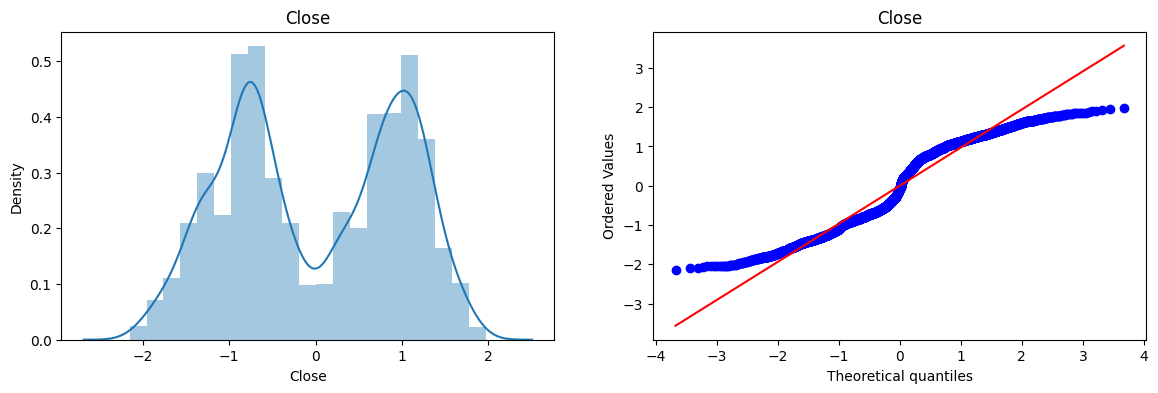

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


High -->has skewness--> -0.03583058457158757


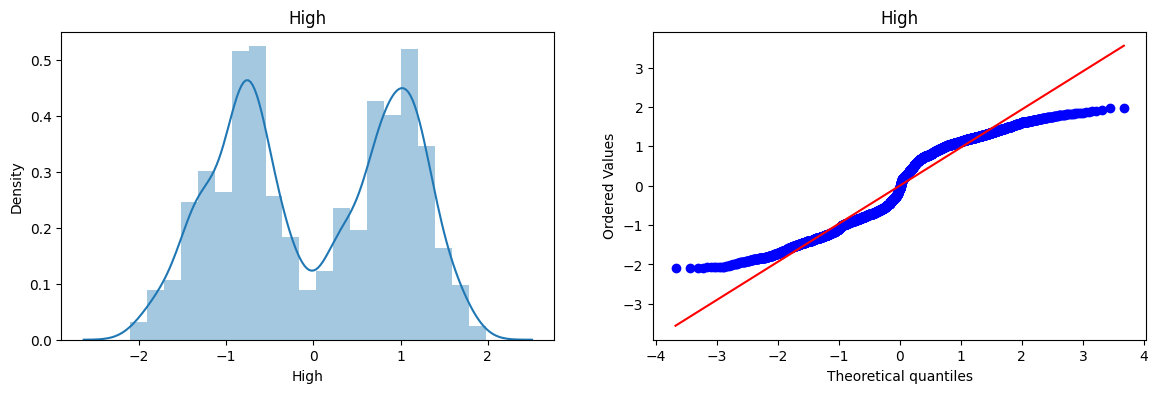

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Open -->has skewness--> -0.03681644512547793


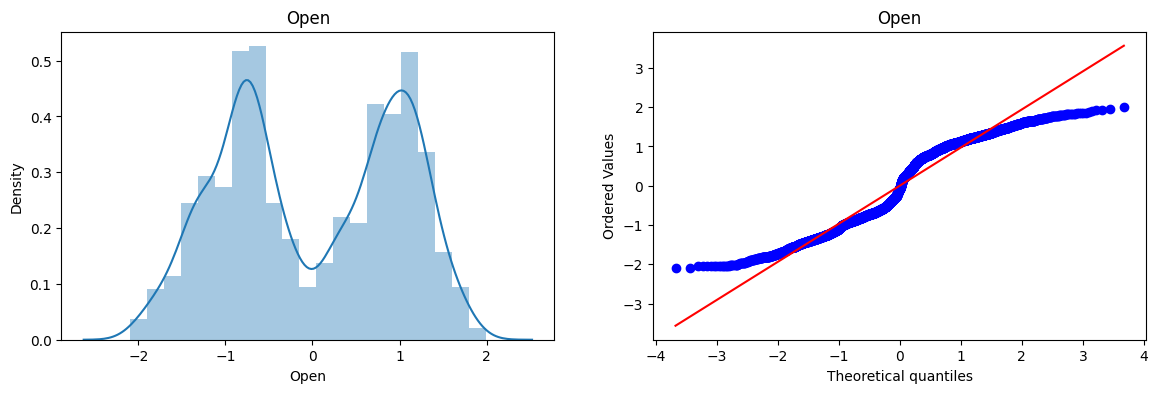

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Volume -->has skewness--> -0.19373545351866248


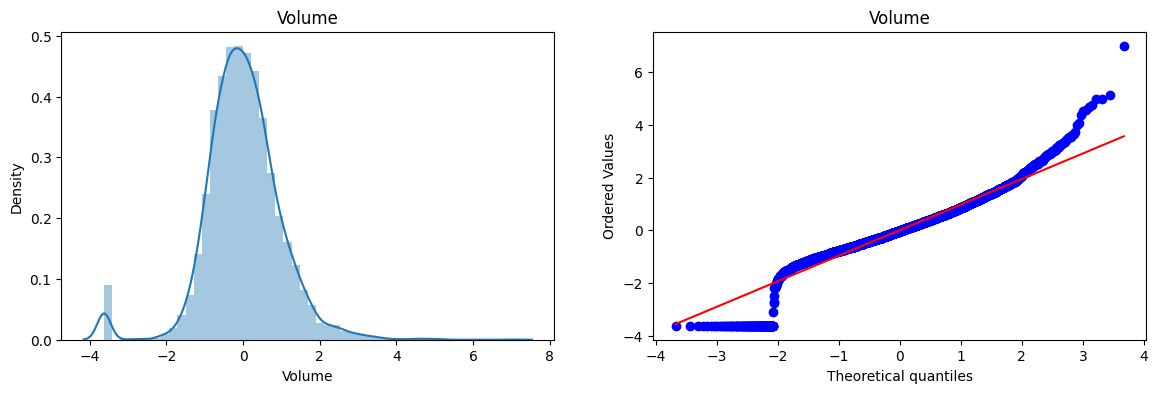

In [23]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
for col in X_train_trf.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # sns.histplot(X_train[col],kde=True,stat="density")
    sns.distplot(X_train_trf[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_trf[col], dist="norm", plot=plt)
    plt.title(col)
    print(f'{col} -->has skewness--> {skew(X_train_trf[col])}')
    plt.show()

In [24]:
pd.DataFrame({'cols':X_train.columns, name:pt.lambdas_})

,cols,box-cox
0,Adj_Close,-0.182594
1,Close,0.086344
2,High,0.076478
3,Open,0.089622
4,Volume,0.395337


# WITH yeo-johnson TRANSFORMERS

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Adj_Close -->has skewness--> 0.04041059287270925


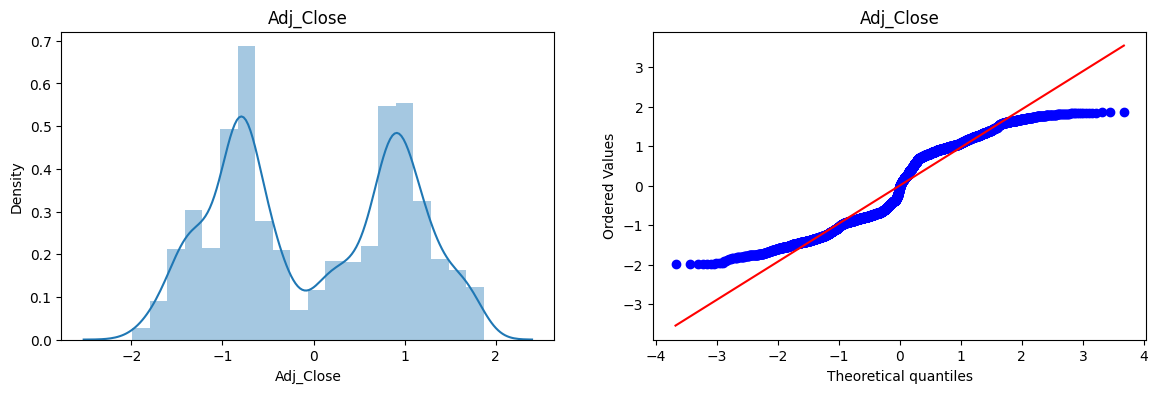

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Close -->has skewness--> -0.03402758378467602


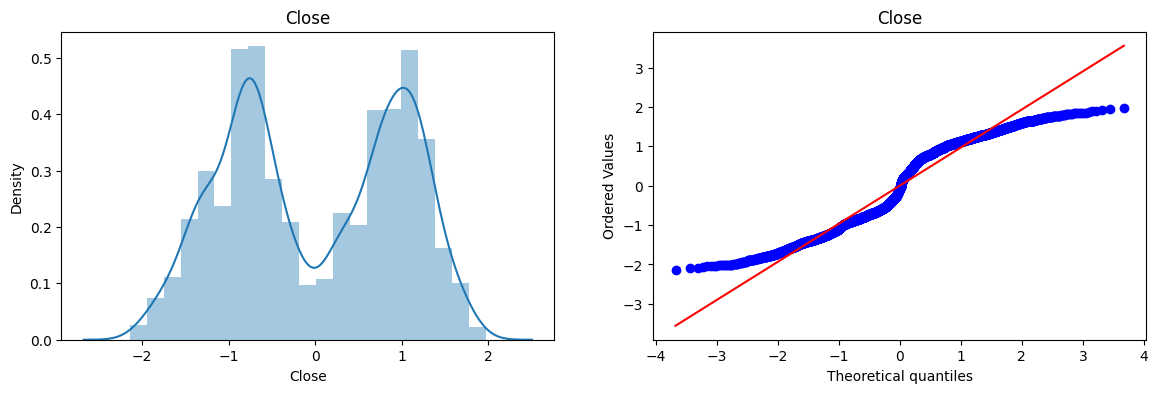

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


High -->has skewness--> -0.03287023585518836


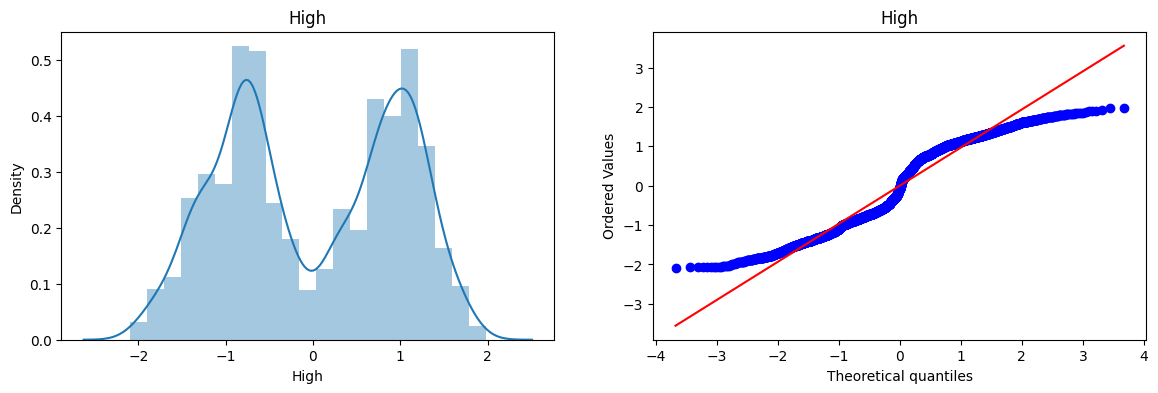

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Open -->has skewness--> -0.03379653826137273


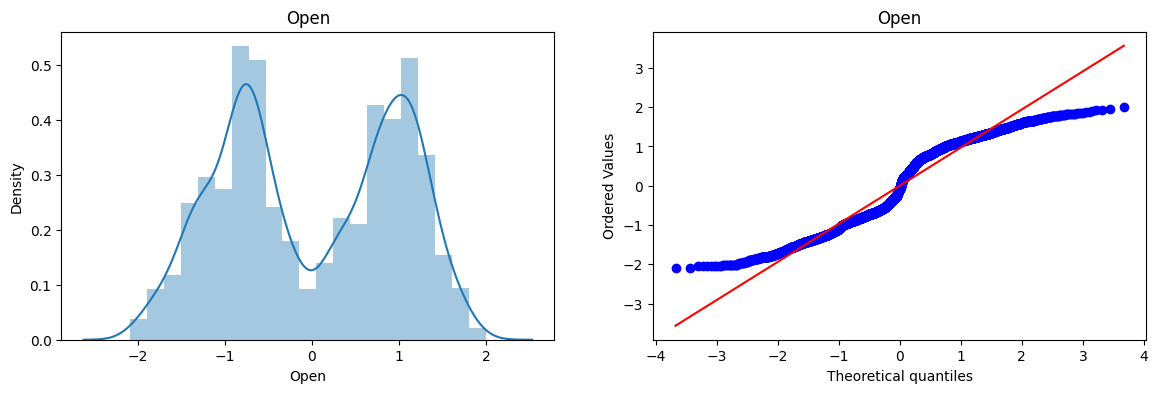

C:\Users\shiva\AppData\Local\Temp\ipykernel_3064\3399791911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trf[col])


Volume -->has skewness--> 0.10862402488441944


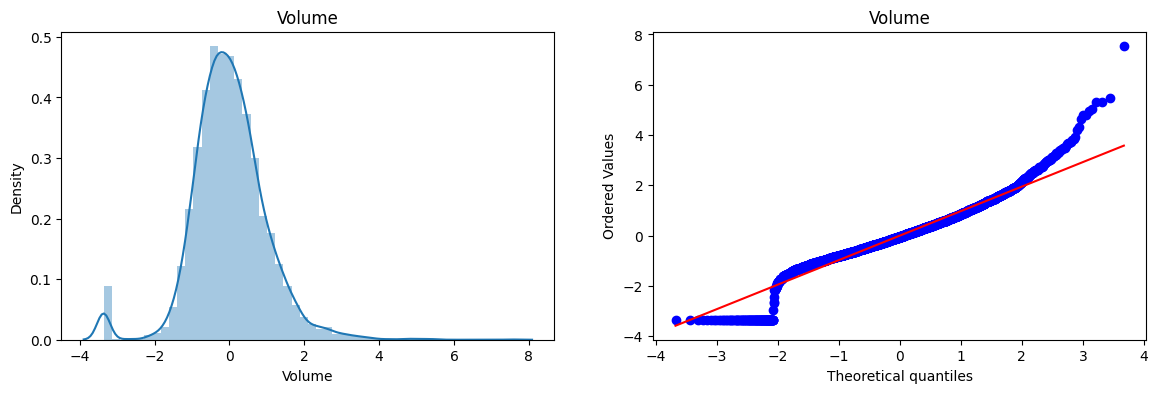

In [27]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
for col in X_train_trf.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # sns.histplot(X_train[col],kde=True,stat="density")
    sns.distplot(X_train_trf[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_trf[col], dist="norm", plot=plt)
    plt.title(col)
    print(f'{col} -->has skewness--> {skew(X_train_trf[col])}')
    plt.show()

In [28]:
pd.DataFrame({'cols':X_train.columns, name:pt.lambdas_})

,cols,yeo-johnson
0,Adj_Close,-0.216082
1,Close,0.071982
2,High,0.062224
3,Open,0.075277
4,Volume,0.431393
